In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("Revenue.csv")

In [3]:
df.head()

,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,day_type,room_class,successful_bookings,capacity
0,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,25,30
1,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,28,30
2,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,23,30
3,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,13,19
4,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,weekend,Standard,18,19


In [4]:
df.isnull().sum()

booking_date                0
check_in_date               0
checkout_date               0
no_guests                   0
room_category               0
booking_platform            0
ratings_given          310701
booking_status              0
revenue_generated           0
revenue_realized            0
property_name               0
category                    0
city                        0
date                        0
mmm yy                      0
day_type                    0
room_class                  0
successful_bookings         0
capacity                    0
dtype: int64

In [5]:
df.drop(['booking_date', 'booking_platform', 'ratings_given', 'check_in_date', 'checkout_date', 'no_guests', 'room_category', 'booking_status', 'revenue_generated', 
          'category', 'city', 'day_type', 'room_class', 'successful_bookings', 'capacity'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [6]:
df.head()

,revenue_realized,property_name,date,mmm yy
0,10010,Atliq Grands,01-05-2022,May-22
1,3640,Atliq Grands,01-05-2022,May-22
2,9100,Atliq Grands,01-05-2022,May-22
3,3640,Atliq Grands,01-05-2022,May-22
4,10920,Atliq Grands,01-05-2022,May-22


In [7]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

atliq_df = df[df['property_name'] == 'Atliq Grands']
daily_revenue_atliq = atliq_df.groupby('date')['revenue_realized'].sum().reset_index()

print(daily_revenue_atliq)

          date  revenue_realized
0   2022-05-01           3216149
1   2022-05-02           2275841
2   2022-05-03           2239979
3   2022-05-04           2199853
4   2022-05-05           2378635
..         ...               ...
358 2023-04-26           1873634
359 2023-04-27           1780484
360 2023-04-28           1800777
361 2023-04-29           1802777
362 2023-04-30           2637326

[363 rows x 2 columns]


In [8]:
indexed_daily_revenue_atliq = daily_revenue_atliq.set_index(['date'])

In [9]:
from datetime import datetime
indexed_daily_revenue_atliq.head(5)

,revenue_realized
date,
2022-05-01,3216149
2022-05-02,2275841
2022-05-03,2239979
2022-05-04,2199853
2022-05-05,2378635


In [10]:
indexed_daily_revenue_atliq.tail(5)

,revenue_realized
date,
2023-04-26,1873634
2023-04-27,1780484
2023-04-28,1800777
2023-04-29,1802777
2023-04-30,2637326


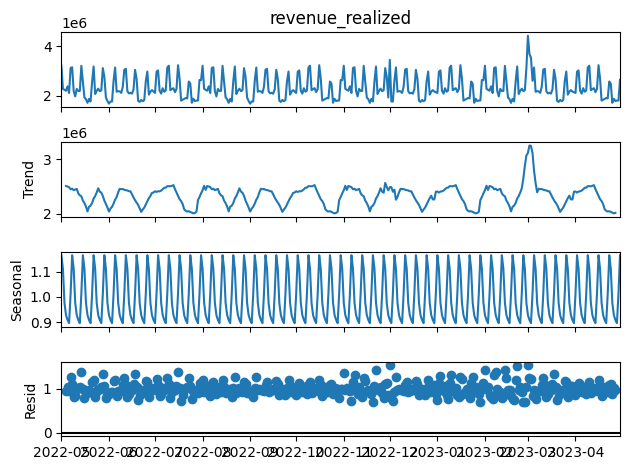

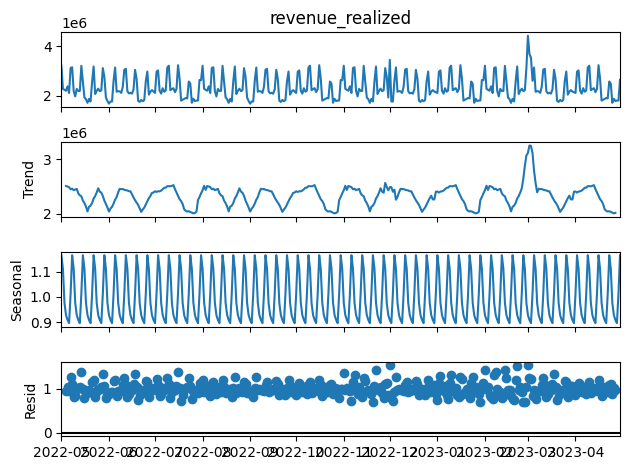

In [11]:
indexed_daily_revenue_atliq.index = pd.to_datetime(indexed_daily_revenue_atliq.index, format='%d-%m-%Y')
indexed_daily_revenue_atliq = indexed_daily_revenue_atliq.asfreq('D')
indexed_daily_revenue_atliq['revenue_realized'] = indexed_daily_revenue_atliq['revenue_realized'].interpolate()
result = seasonal_decompose(indexed_daily_revenue_atliq['revenue_realized'], model='multiplicative')
result.plot()

In [12]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 
  
stepwise_fit = auto_arima(indexed_daily_revenue_atliq['revenue_realized'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',  
                          suppress_warnings = True,  
                          stepwise = True)           
  
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=10323.956, Time=0.73 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10588.349, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10421.410, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=10325.100, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10586.670, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=10494.872, Time=0.19 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=10316.008, Time=0.74 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=10388.007, Time=0.55 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=10310.941, Time=3.27 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=10324.966, Time=2.25 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=10311.454, Time=4.01 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=10315.871, Time=2.93 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=10314.891, Time=2.33 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=10336.678, Time=2.46 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  365
Model:             SARIMAX(3, 0, 3)x(1, 1, [1], 12)   Log Likelihood               -5105.471
Date:                              Tue, 02 Apr 2024   AIC                          10228.941
Time:                                      22:03:00   BIC                          10263.740
Sample:                                  05-01-2022   HQIC                         10242.788
                                       - 04-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0889      0.097     21.577      0.000       1.899       2.279
ar.L2         -2.0449      0.120    -17.024      0.000      -2.280      -1.809
ar.L3          0.8343      0.096      8.658      0.000       0.645       1.023
ma.L1         -1.7550      0.165    -10.653      0.000      -2.078      -1.432
ma.L2          1.6118      0.205      7.877      0.000       1.211       2.013
ma.L3         -0.5194      0.166     -3.132      0.002      -0.845      -0.194
ar.S.L12      -0.3056      0.118     -2.579      0.010      -0.538      -0.073
ma.S.L12      -0.8416      0.088     -9.522      0.000      -1.015      -0.668
sigma2      3.333e+11   1.06e-13   3.13e+24      0.000    3.33e+11    3.33e+11
===================================================================================
Ljung-Box (L1) (Q):                   2.51   Jarque-Bera (JB):                20.63
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.46
Prob(H) (two-sided):                  0.95   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.3e+41. Standard errors may be unstable.
"""

In [13]:
train = indexed_daily_revenue_atliq.iloc[:270] 
test = indexed_daily_revenue_atliq.iloc[270:]   

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(1, 1, [1], 12)) 

result = model.fit() 
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     revenue_realized   No. Observations:                  270
Model:             SARIMAX(3, 0, 3)x(1, 1, [1], 12)   Log Likelihood               -3715.836
Date:                              Tue, 02 Apr 2024   AIC                           7449.672
Time:                                      22:03:05   BIC                           7481.649
Sample:                                  05-01-2022   HQIC                          7462.530
                                       - 01-25-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2372      0.020    109.855      0.000       2.197       2.277
ar.L2         -2.2321      0.025    -88.257      0.000      -2.282      -2.183
ar.L3          0.9802      0.020     49.060      0.000       0.941       1.019
ma.L1         -2.0826      0.101    -20.660      0.000      -2.280      -1.885
ma.L2          2.0288      0.179     11.359      0.000       1.679       2.379
ma.L3         -0.8162      0.106     -7.683      0.000      -1.024      -0.608
ar.S.L12      -0.3552      0.146     -2.430      0.015      -0.642      -0.069
ma.S.L12      -0.7363      0.151     -4.884      0.000      -1.032      -0.441
sigma2      3.129e+11   2.94e-13   1.06e+24      0.000    3.13e+11    3.13e+11
===================================================================================
Ljung-Box (L1) (Q):                   2.67   Jarque-Bera (JB):                 5.96
Prob(Q):                              0.10   Prob(JB):                         0.05
Heteroskedasticity (H):               0.99   Skew:                             0.22
Prob(H) (two-sided):                  0.97   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.98e+39. Standard errors may be unstable.
"""

<Axes: xlabel='date'>

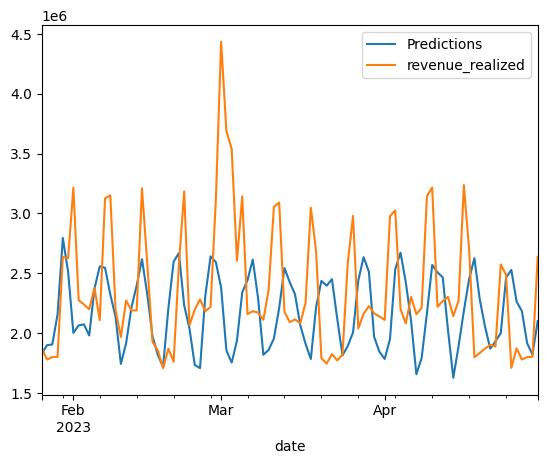

In [14]:
start = len(train) 
end = len(train) + len(test) - 1

predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
predictions.plot(legend = True) 
test['revenue_realized'].plot(legend = True) 


In [15]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

predictions = result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

rmse_value = rmse(test["revenue_realized"], predictions) 
print("Root Mean Squared Error (RMSE):", rmse_value)

mse_value = mean_squared_error(test["revenue_realized"], predictions) 
print("Mean Squared Error (MSE):", mse_value)

max_value = test["revenue_realized"].max()
min_value = test["revenue_realized"].min()

rmse_percentage = (rmse_value / (max_value - min_value)) * 100
mse_percentage = (mse_value / ((max_value - min_value) ** 2)) * 100

print("RMSE Percentage of Data Range:", rmse_percentage)
print("MSE Percentage of Data Range:", mse_percentage)

Root Mean Squared Error (RMSE): 601113.7410519933
Mean Squared Error (MSE): 361337729681.52295
RMSE Percentage of Data Range: 22.049663652266425
MSE Percentage of Data Range: 4.8618766717807915


<Axes: xlabel='date'>

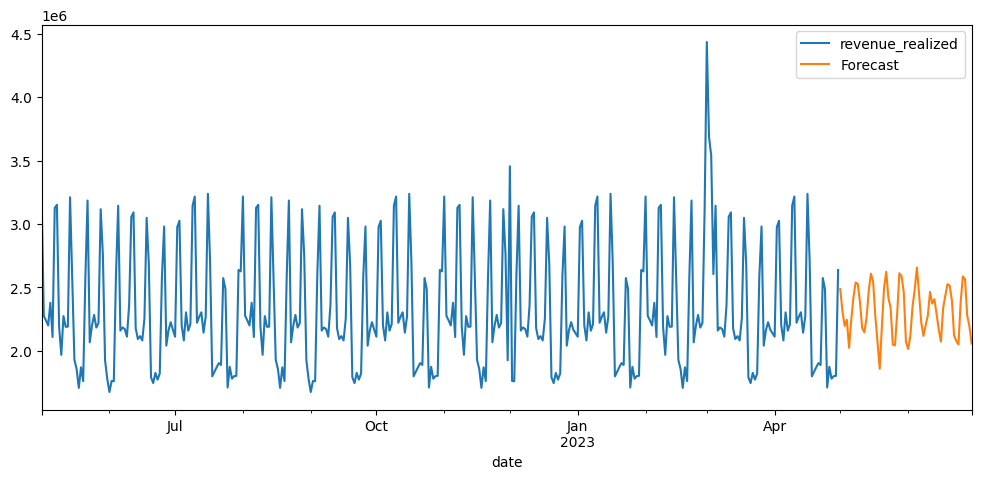

In [16]:
model = SARIMAX(indexed_daily_revenue_atliq['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(1, 1, 1, 12)) 
result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_atliq),  
                          end=len(indexed_daily_revenue_atliq) + 60, 
                          typ='levels').rename('Forecast') 
  
indexed_daily_revenue_atliq['revenue_realized'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [17]:
model = SARIMAX(indexed_daily_revenue_atliq['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(1, 1, 1, 12)) 
result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_atliq),  
                          end=len(indexed_daily_revenue_atliq) + 60, 
                          typ='levels').rename('Forecast') 

print(forecast)  

2023-05-01    2.487532e+06
2023-05-02    2.308484e+06
2023-05-03    2.196453e+06
2023-05-04    2.244556e+06
2023-05-05    2.024191e+06
                  ...     
2023-06-26    2.586764e+06
2023-06-27    2.564754e+06
2023-06-28    2.277568e+06
2023-06-29    2.193309e+06
2023-06-30    2.057926e+06
Freq: D, Name: Forecast, Length: 61, dtype: float64


In [85]:
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(indexed_daily_revenue_atliq['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(1, 1, 1, 12)) 
result = model.fit()

with open('sarimax_model1.pkl', 'wb') as file:
    pickle.dump(result, file)

In [18]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

exotica_df = df[df['property_name'] == 'Atliq Exotica']
daily_revenue_exotica = exotica_df.groupby('date')['revenue_realized'].sum().reset_index()

print(daily_revenue_exotica)

          date  revenue_realized
0   2022-05-01           4604388
1   2022-05-02           3307310
2   2022-05-03           3273133
3   2022-05-04           3338519
4   2022-05-05           3363284
..         ...               ...
358 2023-04-26           2746436
359 2023-04-27           2824846
360 2023-04-28           2656874
361 2023-04-29           2609220
362 2023-04-30           3886856

[363 rows x 2 columns]


In [19]:
indexed_daily_revenue_exotica = daily_revenue_exotica.set_index(['date'])

In [20]:
from datetime import datetime
indexed_daily_revenue_exotica.head(5)

,revenue_realized
date,
2022-05-01,4604388
2022-05-02,3307310
2022-05-03,3273133
2022-05-04,3338519
2022-05-05,3363284


In [21]:
indexed_daily_revenue_exotica.tail(5)

,revenue_realized
date,
2023-04-26,2746436
2023-04-27,2824846
2023-04-28,2656874
2023-04-29,2609220
2023-04-30,3886856


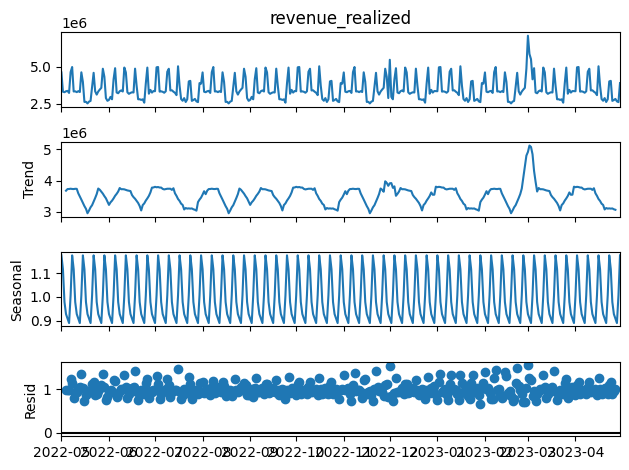

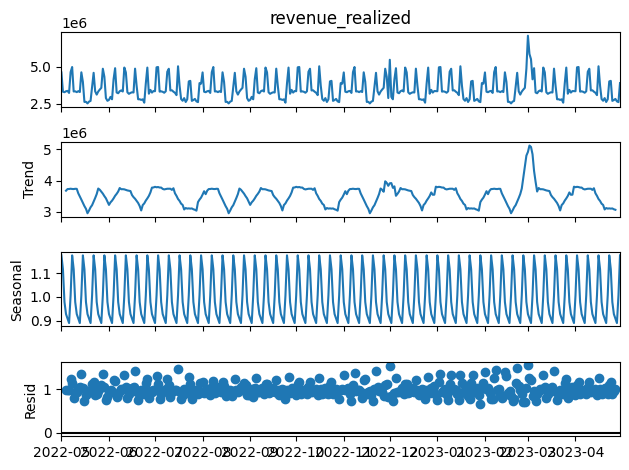

In [22]:
indexed_daily_revenue_exotica.index = pd.to_datetime(indexed_daily_revenue_exotica.index, format='%d-%m-%Y')
indexed_daily_revenue_exotica = indexed_daily_revenue_exotica.asfreq('D')
indexed_daily_revenue_exotica['revenue_realized'] = indexed_daily_revenue_exotica['revenue_realized'].interpolate()
result = seasonal_decompose(indexed_daily_revenue_exotica['revenue_realized'], model='multiplicative')
result.plot()

In [23]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 
  
stepwise_fit = auto_arima(indexed_daily_revenue_exotica['revenue_realized'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',  
                          suppress_warnings = True,  
                          stepwise = True)           
  
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=10659.145, Time=0.65 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10916.786, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10752.609, Time=0.35 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=10659.883, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10915.088, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=10826.975, Time=0.19 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=10651.966, Time=0.72 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=10727.831, Time=0.48 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=10645.389, Time=3.23 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=10664.695, Time=2.44 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=10646.868, Time=4.22 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=10650.641, Time=3.12 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=10649.394, Time=2.19 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=10665.559, Time=2.60 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  365
Model:             SARIMAX(2, 0, 3)x(2, 1, [1], 12)   Log Likelihood               -5273.357
Date:                              Tue, 02 Apr 2024   AIC                          10564.714
Time:                                      22:08:28   BIC                          10599.513
Sample:                                  05-01-2022   HQIC                         10578.561
                                       - 04-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3711      0.146      2.539      0.011       0.085       0.658
ar.L2         -0.5578      0.140     -3.983      0.000      -0.832      -0.283
ma.L1          0.1394      0.148      0.940      0.347      -0.151       0.430
ma.L2          0.6646      0.086      7.746      0.000       0.496       0.833
ma.L3          0.5216      0.104      5.007      0.000       0.317       0.726
ar.S.L12      -0.3583      0.132     -2.720      0.007      -0.617      -0.100
ar.S.L24      -0.2075      0.122     -1.696      0.090      -0.447       0.032
ma.S.L12      -0.8096      0.104     -7.808      0.000      -1.013      -0.606
sigma2      8.417e+11   5.16e-14   1.63e+25      0.000    8.42e+11    8.42e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                28.21
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.69
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.17e+42. Standard errors may be unstable.
"""

In [24]:
train = indexed_daily_revenue_exotica.iloc[:270] 
test = indexed_daily_revenue_exotica.iloc[270:]   

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['revenue_realized'],  
                order=(2, 0, 3),  
                seasonal_order=(2, 1, 1, 12)) 

result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     revenue_realized   No. Observations:                  270
Model:             SARIMAX(2, 0, 3)x(2, 1, [1], 12)   Log Likelihood               -3854.161
Date:                              Tue, 02 Apr 2024   AIC                           7726.323
Time:                                      22:08:37   BIC                           7758.299
Sample:                                  05-01-2022   HQIC                          7739.181
                                       - 01-25-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2466      0.019     65.489      0.000       1.209       1.284
ar.L2         -0.9905      0.018    -54.245      0.000      -1.026      -0.955
ma.L1         -0.7841      0.111     -7.042      0.000      -1.002      -0.566
ma.L2          0.4643      0.132      3.516      0.000       0.205       0.723
ma.L3          0.3786      0.114      3.307      0.001       0.154       0.603
ar.S.L12      -0.1959      0.171     -1.148      0.251      -0.530       0.138
ar.S.L24      -0.0298      0.134     -0.222      0.824      -0.293       0.233
ma.S.L12      -0.7178      0.159     -4.511      0.000      -1.030      -0.406
sigma2      8.161e+11   8.32e-14   9.81e+24      0.000    8.16e+11    8.16e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                10.89
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.50
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.46e+41. Standard errors may be unstable.
"""

<Axes: xlabel='date'>

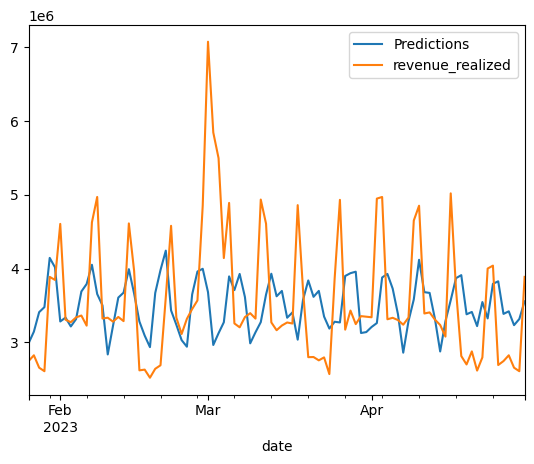

In [25]:
start = len(train) 
end = len(train) + len(test) - 1

predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
predictions.plot(legend = True) 
test['revenue_realized'].plot(legend = True) 

In [26]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

predictions = result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

rmse_value = rmse(test["revenue_realized"], predictions) 
print("Root Mean Squared Error (RMSE):", rmse_value)

mse_value = mean_squared_error(test["revenue_realized"], predictions) 
print("Mean Squared Error (MSE):", mse_value)

max_value = test["revenue_realized"].max()
min_value = test["revenue_realized"].min()

rmse_percentage = (rmse_value / (max_value - min_value)) * 100
mse_percentage = (mse_value / ((max_value - min_value) ** 2)) * 100

print("RMSE Percentage of Data Range:", rmse_percentage)
print("MSE Percentage of Data Range:", mse_percentage)

Root Mean Squared Error (RMSE): 871859.7736212006
Mean Squared Error (MSE): 760139464858.8112
RMSE Percentage of Data Range: 19.159424659402944
MSE Percentage of Data Range: 3.6708355327933777


<Axes: xlabel='date'>

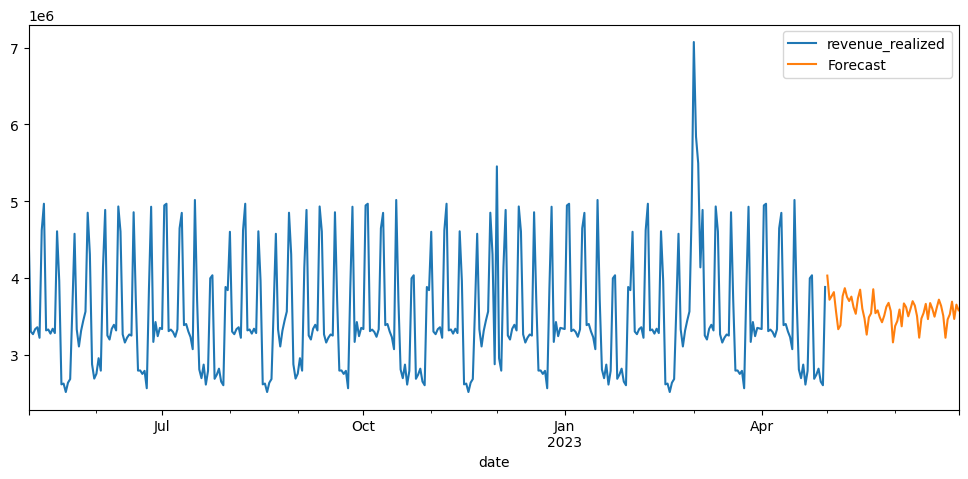

In [27]:
model = SARIMAX(indexed_daily_revenue_exotica['revenue_realized'],  
                order=(2, 0, 3),  
                seasonal_order=(2, 1, 1, 12)) 
result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_exotica),  
                          end=len(indexed_daily_revenue_exotica) + 60, 
                          typ='levels').rename('Forecast') 
  
indexed_daily_revenue_exotica['revenue_realized'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [28]:
model = SARIMAX(indexed_daily_revenue_exotica['revenue_realized'],  
                order=(2, 0, 3),  
                seasonal_order=(2, 1, 1, 12)) 
result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_exotica),  
                          end=len(indexed_daily_revenue_exotica) + 60, 
                          typ='levels').rename('Forecast') 

print(forecast)  

2023-05-01    4.034838e+06
2023-05-02    3.721066e+06
2023-05-03    3.768397e+06
2023-05-04    3.820151e+06
2023-05-05    3.564530e+06
                  ...     
2023-06-26    3.531732e+06
2023-06-27    3.695617e+06
2023-06-28    3.471081e+06
2023-06-29    3.657482e+06
2023-06-30    3.583638e+06
Freq: D, Name: Forecast, Length: 61, dtype: float64


In [86]:
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(indexed_daily_revenue_exotica['revenue_realized'],  
                order=(2, 0, 3),  
                seasonal_order=(2, 1, 1, 12)) 
result = model.fit()

with open('sarimax_model2.pkl', 'wb') as file:
    pickle.dump(result, file)

In [29]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

city_df = df[df['property_name'] == 'Atliq City']
daily_revenue_city = city_df.groupby('date')['revenue_realized'].sum().reset_index()

print(daily_revenue_city)

          date  revenue_realized
0   2022-05-01           4400527
1   2022-05-02           2926856
2   2022-05-03           2822909
3   2022-05-04           3022376
4   2022-05-05           2982371
..         ...               ...
358 2023-04-26           2397653
359 2023-04-27           2373059
360 2023-04-28           2442071
361 2023-04-29           2569974
362 2023-04-30           3446174

[363 rows x 2 columns]


In [30]:
indexed_daily_revenue_city = daily_revenue_city.set_index(['date'])

In [31]:
from datetime import datetime
indexed_daily_revenue_city.head(5)

,revenue_realized
date,
2022-05-01,4400527
2022-05-02,2926856
2022-05-03,2822909
2022-05-04,3022376
2022-05-05,2982371


In [32]:
indexed_daily_revenue_city.tail(5)

,revenue_realized
date,
2023-04-26,2397653
2023-04-27,2373059
2023-04-28,2442071
2023-04-29,2569974
2023-04-30,3446174


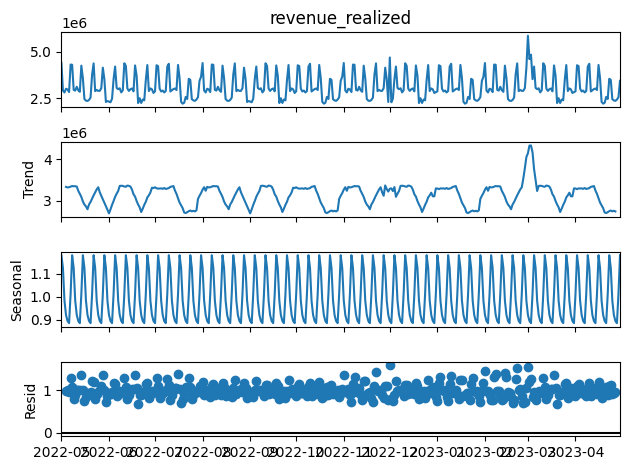

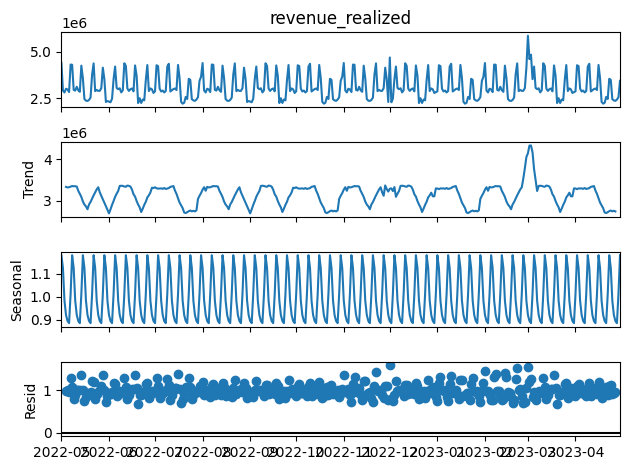

In [33]:
indexed_daily_revenue_city.index = pd.to_datetime(indexed_daily_revenue_city.index, format='%d-%m-%Y')
indexed_daily_revenue_city = indexed_daily_revenue_city.asfreq('D')
indexed_daily_revenue_city['revenue_realized'] = indexed_daily_revenue_city['revenue_realized'].interpolate()
result = seasonal_decompose(indexed_daily_revenue_city['revenue_realized'], model='multiplicative')
result.plot()

In [34]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 
  
stepwise_fit = auto_arima(indexed_daily_revenue_city['revenue_realized'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',  
                          suppress_warnings = True,  
                          stepwise = True)           
  
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=10574.247, Time=0.59 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10834.945, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10678.262, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=10574.407, Time=0.50 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10833.266, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=10741.082, Time=0.19 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=10567.379, Time=0.74 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=10643.317, Time=0.58 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=10559.245, Time=3.21 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=10574.851, Time=2.24 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=10560.343, Time=3.84 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=10566.210, Time=3.17 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=10562.306, Time=1.97 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=10583.954, Time=2.56 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  365
Model:             SARIMAX(3, 0, 3)x(2, 1, [1], 12)   Log Likelihood               -5225.763
Date:                              Tue, 02 Apr 2024   AIC                          10471.526
Time:                                      22:12:21   BIC                          10510.190
Sample:                                  05-01-2022   HQIC                         10486.911
                                       - 04-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1832      0.064     33.999      0.000       2.057       2.309
ar.L2         -2.1650      0.080    -26.960      0.000      -2.322      -2.008
ar.L3          0.9295      0.065     14.411      0.000       0.803       1.056
ma.L1         -1.9185      0.133    -14.378      0.000      -2.180      -1.657
ma.L2          1.8272      0.169     10.828      0.000       1.496       2.158
ma.L3         -0.6772      0.134     -5.054      0.000      -0.940      -0.415
ar.S.L12      -0.4056      0.154     -2.639      0.008      -0.707      -0.104
ar.S.L24      -0.1182      0.148     -0.798      0.425      -0.408       0.172
ma.S.L12      -0.8424      0.099     -8.531      0.000      -1.036      -0.649
sigma2      6.666e+11   8.91e-14   7.48e+24      0.000    6.67e+11    6.67e+11
===================================================================================
Ljung-Box (L1) (Q):                   5.11   Jarque-Bera (JB):                18.45
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.38
Prob(H) (two-sided):                  0.52   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.12e+41. Standard errors may be unstable.
"""

In [35]:
train = indexed_daily_revenue_city.iloc[:270] 
test = indexed_daily_revenue_city.iloc[270:]   

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(2, 1, 1, 12)) 

result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     revenue_realized   No. Observations:                  270
Model:             SARIMAX(3, 0, 3)x(2, 1, [1], 12)   Log Likelihood               -3822.799
Date:                              Tue, 02 Apr 2024   AIC                           7665.598
Time:                                      22:12:28   BIC                           7701.128
Sample:                                  05-01-2022   HQIC                          7679.885
                                       - 01-25-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3438      0.185      1.859      0.063      -0.019       0.706
ar.L2         -0.5048      0.209     -2.421      0.015      -0.914      -0.096
ar.L3          0.0018      0.216      0.008      0.993      -0.422       0.425
ma.L1          0.1773      0.181      0.977      0.328      -0.178       0.533
ma.L2          0.6545      0.125      5.217      0.000       0.409       0.900
ma.L3          0.5421      0.170      3.194      0.001       0.209       0.875
ar.S.L12      -0.4830      0.141     -3.432      0.001      -0.759      -0.207
ar.S.L24      -0.3072      0.126     -2.442      0.015      -0.554      -0.061
ma.S.L12      -0.6363      0.144     -4.420      0.000      -0.918      -0.354
sigma2      6.468e+11   2.06e-13   3.14e+24      0.000    6.47e+11    6.47e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 8.38
Prob(Q):                              0.90   Prob(JB):                         0.02
Heteroskedasticity (H):               0.67   Skew:                             0.43
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.08e+40. Standard errors may be unstable.
"""

<Axes: xlabel='date'>

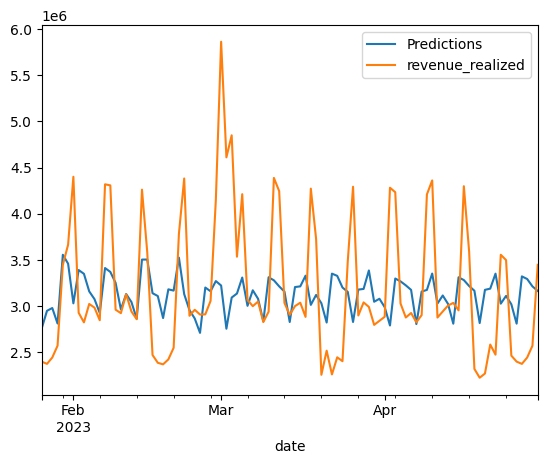

In [36]:
start = len(train) 
end = len(train) + len(test) - 1

predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
predictions.plot(legend = True) 
test['revenue_realized'].plot(legend = True) 

In [37]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

predictions = result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

rmse_value = rmse(test["revenue_realized"], predictions) 
print("Root Mean Squared Error (RMSE):", rmse_value)

mse_value = mean_squared_error(test["revenue_realized"], predictions) 
print("Mean Squared Error (MSE):", mse_value)

max_value = test["revenue_realized"].max()
min_value = test["revenue_realized"].min()

rmse_percentage = (rmse_value / (max_value - min_value)) * 100
mse_percentage = (mse_value / ((max_value - min_value) ** 2)) * 100

print("RMSE Percentage of Data Range:", rmse_percentage)
print("MSE Percentage of Data Range:", mse_percentage)

Root Mean Squared Error (RMSE): 714499.6264066016
Mean Squared Error (MSE): 510509716135.17334
RMSE Percentage of Data Range: 19.627654718100626
MSE Percentage of Data Range: 3.8524482973297776


<Axes: xlabel='date'>

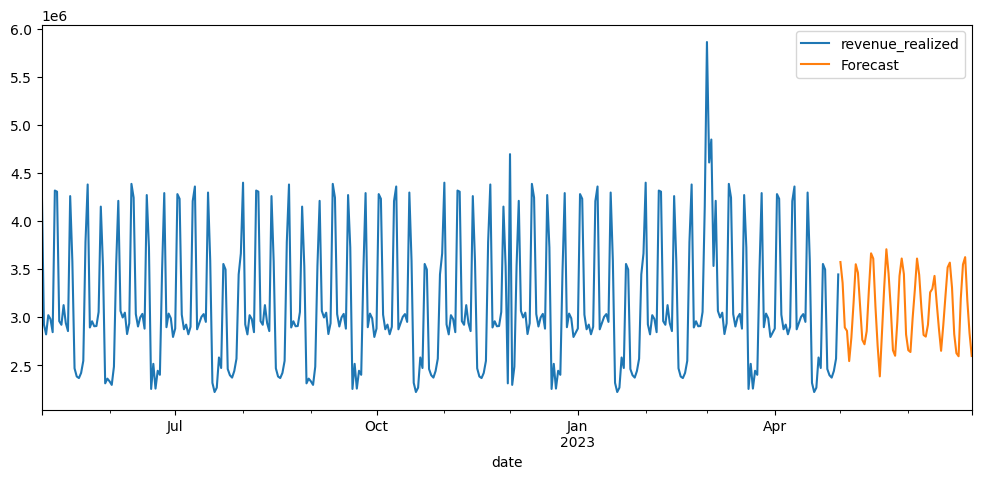

In [38]:
model = SARIMAX(indexed_daily_revenue_city['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(2, 1, 1, 12)) 
result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_city),  
                          end=len(indexed_daily_revenue_city) + 60, 
                          typ='levels').rename('Forecast') 
  
indexed_daily_revenue_city['revenue_realized'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [39]:
model = SARIMAX(indexed_daily_revenue_city['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(2, 1, 1, 12)) 
result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_city),  
                          end=len(indexed_daily_revenue_city) + 60, 
                          typ='levels').rename('Forecast') 

print(forecast)  


2023-05-01    3.575047e+06
2023-05-02    3.358025e+06
2023-05-03    2.894032e+06
2023-05-04    2.858826e+06
2023-05-05    2.544955e+06
                  ...     
2023-06-26    3.549861e+06
2023-06-27    3.626283e+06
2023-06-28    3.172707e+06
2023-06-29    2.834782e+06
2023-06-30    2.597788e+06
Freq: D, Name: Forecast, Length: 61, dtype: float64


In [87]:
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(indexed_daily_revenue_city['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(2, 1, 1, 12)) 
result = model.fit()

with open('sarimax_model3.pkl', 'wb') as file:
    pickle.dump(result, file)

In [40]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

blu_df = df[df['property_name'] == 'Atliq Blu']
daily_revenue_blu = blu_df.groupby('date')['revenue_realized'].sum().reset_index()

print(daily_revenue_blu)

          date  revenue_realized
0   2022-05-01           3780604
1   2022-05-02           2755764
2   2022-05-03           2800387
3   2022-05-04           2524080
4   2022-05-05           2635487
..         ...               ...
358 2023-04-26           2032715
359 2023-04-27           2146882
360 2023-04-28           2327734
361 2023-04-29           2248725
362 2023-04-30           3312538

[363 rows x 2 columns]


In [41]:
indexed_daily_revenue_blu = daily_revenue_blu.set_index(['date'])

In [42]:
from datetime import datetime
indexed_daily_revenue_blu.head(5)

,revenue_realized
date,
2022-05-01,3780604
2022-05-02,2755764
2022-05-03,2800387
2022-05-04,2524080
2022-05-05,2635487


In [43]:
indexed_daily_revenue_blu.tail(5)

,revenue_realized
date,
2023-04-26,2032715
2023-04-27,2146882
2023-04-28,2327734
2023-04-29,2248725
2023-04-30,3312538


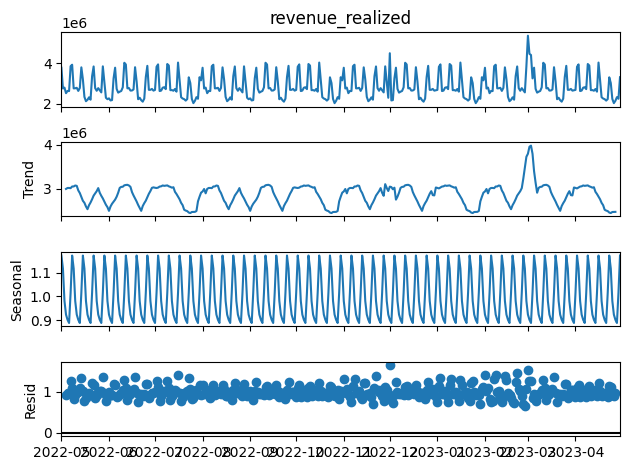

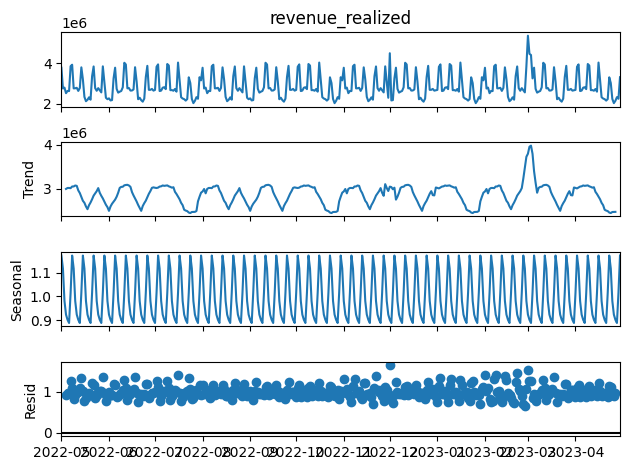

In [44]:
indexed_daily_revenue_blu.index = pd.to_datetime(indexed_daily_revenue_blu.index, format='%d-%m-%Y')
indexed_daily_revenue_blu = indexed_daily_revenue_blu.asfreq('D')
indexed_daily_revenue_blu['revenue_realized'] = indexed_daily_revenue_blu['revenue_realized'].interpolate()
result = seasonal_decompose(indexed_daily_revenue_blu['revenue_realized'], model='multiplicative')
result.plot()

In [45]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 
  
stepwise_fit = auto_arima(indexed_daily_revenue_blu['revenue_realized'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',  
                          suppress_warnings = True,  
                          stepwise = True)           
  
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=10490.023, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10749.044, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10587.048, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=10490.999, Time=0.36 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10747.361, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=10656.597, Time=0.10 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=10482.642, Time=0.46 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=10559.413, Time=0.27 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=10474.423, Time=1.59 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=10490.876, Time=1.38 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=10475.519, Time=2.23 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=10481.010, Time=1.93 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=10478.499, Time=1.11 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=10495.152, Time=1.42 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  365
Model:             SARIMAX(3, 0, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -5191.035
Date:                                 Tue, 02 Apr 2024   AIC                          10404.070
Time:                                         22:15:04   BIC                          10446.601
Sample:                                     05-01-2022   HQIC                         10420.994
                                          - 04-30-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3099.1291   8684.174     -0.357      0.721   -2.01e+04    1.39e+04
ar.L1          1.9650      0.136     14.487      0.000       1.699       2.231
ar.L2         -1.8902      0.169    -11.204      0.000      -2.221      -1.560
ar.L3          0.7112      0.135      5.279      0.000       0.447       0.975
ma.L1         -1.5915      0.184     -8.634      0.000      -1.953      -1.230
ma.L2          1.4183      0.225      6.308      0.000       0.978       1.859
ma.L3         -0.3690      0.184     -2.007      0.045      -0.729      -0.009
ar.S.L12      -0.1586      0.447     -0.355      0.723      -1.034       0.717
ma.S.L12      -0.8711      0.471     -1.849      0.064      -1.794       0.052
ma.S.L24       0.1118      0.416      0.269      0.788      -0.703       0.926
sigma2      5.413e+11      0.000   1.35e+15      0.000    5.41e+11    5.41e+11
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):                21.05
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.54
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.65e+31. Standard errors may be unstable.
"""

In [46]:
train = indexed_daily_revenue_blu.iloc[:270] 
test = indexed_daily_revenue_blu.iloc[270:]   

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(1, 1, [1, 2], 12)) 

result = model.fit() 
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                        revenue_realized   No. Observations:                  270
Model:             SARIMAX(3, 0, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -3795.090
Date:                                 Tue, 02 Apr 2024   AIC                           7610.180
Time:                                         22:15:10   BIC                           7645.709
Sample:                                     05-01-2022   HQIC                          7624.466
                                          - 01-25-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3116      0.225      5.817      0.000       0.870       1.754
ar.L2         -1.0689      0.283     -3.779      0.000      -1.623      -0.514
ar.L3          0.0577      0.225      0.257      0.797      -0.382       0.498
ma.L1         -0.7630      0.204     -3.748      0.000      -1.162      -0.364
ma.L2          0.4118      0.246      1.674      0.094      -0.070       0.894
ma.L3          0.4461      0.199      2.243      0.025       0.056       0.836
ar.S.L12       0.6297      1.197      0.526      0.599      -1.717       2.976
ma.S.L12      -1.5344      1.134     -1.353      0.176      -3.757       0.688
ma.S.L24       0.5963      0.961      0.621      0.535      -1.287       2.479
sigma2      5.161e+11   1.02e-11   5.05e+22      0.000    5.16e+11    5.16e+11
===================================================================================
Ljung-Box (L1) (Q):                   2.59   Jarque-Bera (JB):                18.32
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.56
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.67e+39. Standard errors may be unstable.
"""

<Axes: xlabel='date'>

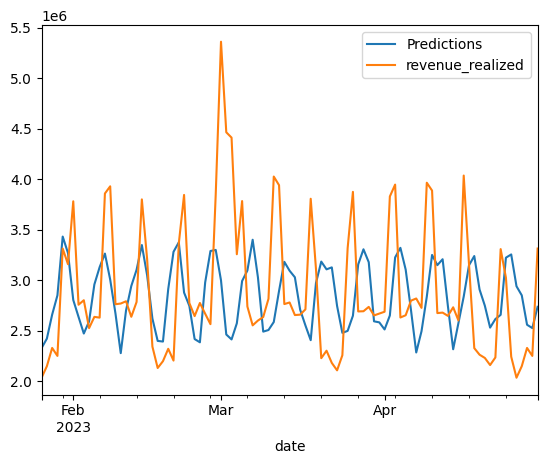

In [47]:
start = len(train) 
end = len(train) + len(test) - 1

predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
predictions.plot(legend = True) 
test['revenue_realized'].plot(legend = True) 

In [48]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

predictions = result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

rmse_value = rmse(test["revenue_realized"], predictions) 
print("Root Mean Squared Error (RMSE):", rmse_value)

mse_value = mean_squared_error(test["revenue_realized"], predictions) 
print("Mean Squared Error (MSE):", mse_value)

max_value = test["revenue_realized"].max()
min_value = test["revenue_realized"].min()

rmse_percentage = (rmse_value / (max_value - min_value)) * 100
mse_percentage = (mse_value / ((max_value - min_value) ** 2)) * 100

print("RMSE Percentage of Data Range:", rmse_percentage)
print("MSE Percentage of Data Range:", mse_percentage)

Root Mean Squared Error (RMSE): 702864.4388408748
Mean Squared Error (MSE): 494018419387.09784
RMSE Percentage of Data Range: 21.114135315767516
MSE Percentage of Data Range: 4.458067101325409


<Axes: xlabel='date'>

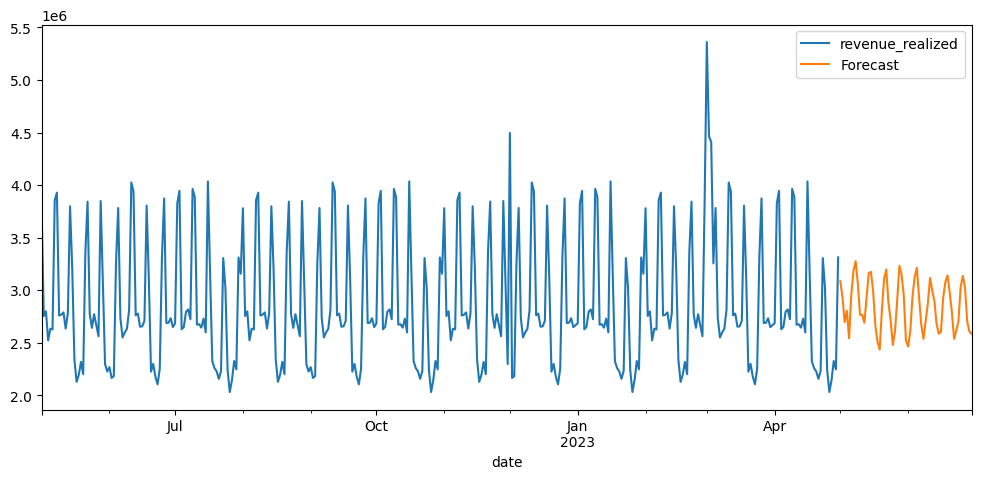

In [49]:
model = SARIMAX(indexed_daily_revenue_blu['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(1, 1, [1, 2], 12)) 
result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_blu),  
                          end=len(indexed_daily_revenue_blu) + 60, 
                          typ='levels').rename('Forecast') 
  
indexed_daily_revenue_blu['revenue_realized'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True)

In [50]:
model = SARIMAX(indexed_daily_revenue_blu['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(1, 1, [1, 2], 12)) 
result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_blu),  
                          end=len(indexed_daily_revenue_blu) + 60, 
                          typ='levels').rename('Forecast') 

print(forecast)

2023-05-01    3.086020e+06
2023-05-02    2.933451e+06
2023-05-03    2.696926e+06
2023-05-04    2.803997e+06
2023-05-05    2.544190e+06
                  ...     
2023-06-26    3.137990e+06
2023-06-27    3.025919e+06
2023-06-28    2.702854e+06
2023-06-29    2.607264e+06
2023-06-30    2.586828e+06
Freq: D, Name: Forecast, Length: 61, dtype: float64


In [88]:
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(indexed_daily_revenue_blu['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(1, 1, [1, 2], 12)) 
result = model.fit()

with open('sarimax_model4.pkl', 'wb') as file:
    pickle.dump(result, file)

In [51]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

bay_df = df[df['property_name'] == 'Atliq Bay']
daily_revenue_bay = bay_df.groupby('date')['revenue_realized'].sum().reset_index()

print(daily_revenue_bay)

          date  revenue_realized
0   2022-05-01           3872833
1   2022-05-02           2563177
2   2022-05-03           2629025
3   2022-05-04           2546782
4   2022-05-05           2659359
..         ...               ...
358 2023-04-26           2258906
359 2023-04-27           2154672
360 2023-04-28           2363177
361 2023-04-29           2458578
362 2023-04-30           3096596

[363 rows x 2 columns]


In [52]:
indexed_daily_revenue_bay = daily_revenue_bay.set_index(['date'])

In [53]:
from datetime import datetime
indexed_daily_revenue_bay.head(5)

,revenue_realized
date,
2022-05-01,3872833
2022-05-02,2563177
2022-05-03,2629025
2022-05-04,2546782
2022-05-05,2659359


In [54]:
indexed_daily_revenue_bay.tail(5)

,revenue_realized
date,
2023-04-26,2258906
2023-04-27,2154672
2023-04-28,2363177
2023-04-29,2458578
2023-04-30,3096596


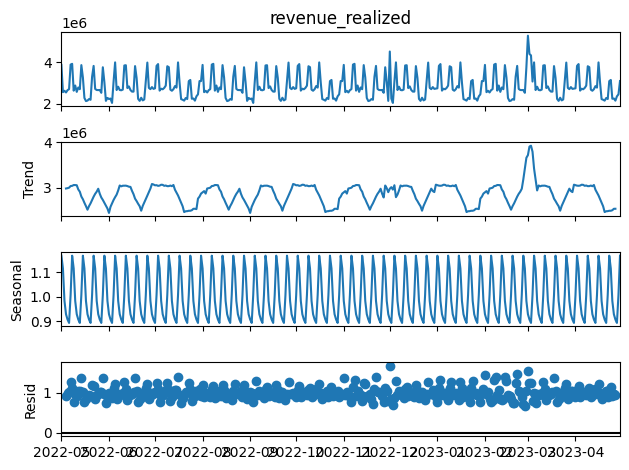

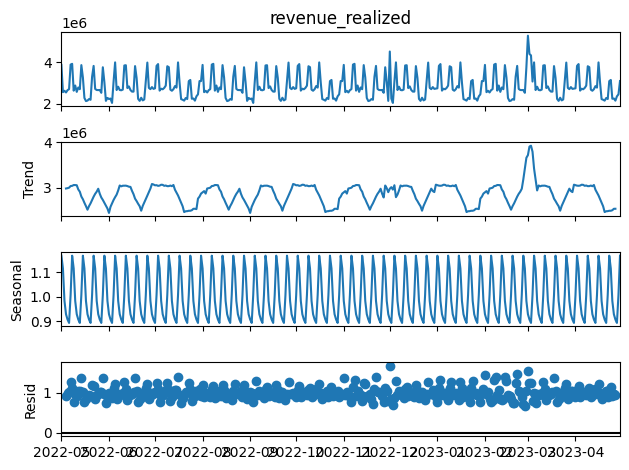

In [55]:
indexed_daily_revenue_bay.index = pd.to_datetime(indexed_daily_revenue_bay.index, format='%d-%m-%Y')
indexed_daily_revenue_bay = indexed_daily_revenue_bay.asfreq('D')
indexed_daily_revenue_bay['revenue_realized'] = indexed_daily_revenue_bay['revenue_realized'].interpolate()
result = seasonal_decompose(indexed_daily_revenue_bay['revenue_realized'], model='multiplicative')
result.plot()

In [56]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 
  
stepwise_fit = auto_arima(indexed_daily_revenue_bay['revenue_realized'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',  
                          suppress_warnings = True,  
                          stepwise = True)           
  
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=10496.970, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10734.919, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10580.691, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=10498.149, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10733.227, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=10665.209, Time=0.11 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=10489.111, Time=0.61 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=10563.612, Time=0.41 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=10481.952, Time=1.84 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=10496.856, Time=1.32 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=10482.961, Time=2.34 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=10488.501, Time=1.47 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=10486.838, Time=1.15 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=10495.379, Time=1.26 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  365
Model:             SARIMAX(2, 0, 3)x(2, 1, [1], 12)   Log Likelihood               -5194.854
Date:                              Tue, 02 Apr 2024   AIC                          10407.708
Time:                                      22:18:33   BIC                          10442.506
Sample:                                  05-01-2022   HQIC                         10421.554
                                       - 04-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4887      0.159      3.081      0.002       0.178       0.800
ar.L2         -0.5876      0.138     -4.260      0.000      -0.858      -0.317
ma.L1          0.0116      0.151      0.077      0.939      -0.284       0.307
ma.L2          0.6575      0.092      7.141      0.000       0.477       0.838
ma.L3          0.4466      0.109      4.112      0.000       0.234       0.659
ar.S.L12      -0.3744      0.123     -3.032      0.002      -0.616      -0.132
ar.S.L24      -0.1955      0.121     -1.609      0.108      -0.434       0.043
ma.S.L12      -0.8100      0.096     -8.465      0.000      -0.998      -0.622
sigma2      5.406e+11   1.56e-13   3.46e+24      0.000    5.41e+11    5.41e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                27.77
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             0.65
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.69e+41. Standard errors may be unstable.
"""

In [57]:
train = indexed_daily_revenue_bay.iloc[:270] 
test = indexed_daily_revenue_bay.iloc[270:]   

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['revenue_realized'],  
                order=(2, 0, 3),  
                seasonal_order=(2, 1, [1], 12)) 

result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     revenue_realized   No. Observations:                  270
Model:             SARIMAX(2, 0, 3)x(2, 1, [1], 12)   Log Likelihood               -3796.716
Date:                              Tue, 02 Apr 2024   AIC                           7611.431
Time:                                      22:18:38   BIC                           7643.408
Sample:                                  05-01-2022   HQIC                          7624.289
                                       - 01-25-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2566      0.005    235.930      0.000       1.246       1.267
ar.L2         -0.9991      0.004   -269.224      0.000      -1.006      -0.992
ma.L1         -0.8402      0.106     -7.905      0.000      -1.049      -0.632
ma.L2          0.5004      0.135      3.713      0.000       0.236       0.765
ma.L3          0.3932      0.113      3.470      0.001       0.171       0.615
ar.S.L12      -0.2171      0.189     -1.150      0.250      -0.587       0.153
ar.S.L24      -0.0065      0.149     -0.044      0.965      -0.299       0.286
ma.S.L12      -0.6752      0.184     -3.673      0.000      -1.035      -0.315
sigma2      5.265e+11   1.21e-13   4.35e+24      0.000    5.27e+11    5.27e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                15.11
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             0.54
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.39e+40. Standard errors may be unstable.
"""

<Axes: xlabel='date'>

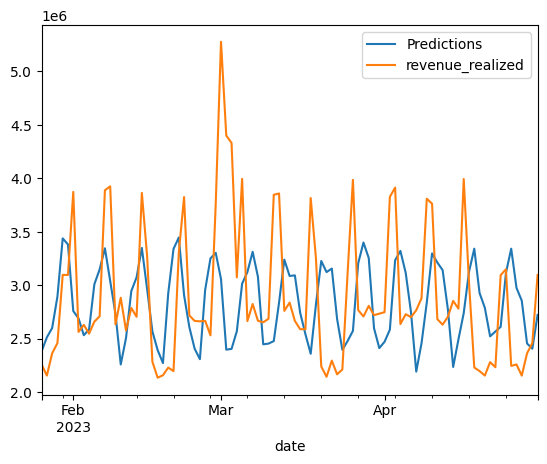

In [58]:
start = len(train) 
end = len(train) + len(test) - 1

predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
predictions.plot(legend = True) 
test['revenue_realized'].plot(legend = True) 

In [59]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

predictions = result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

rmse_value = rmse(test["revenue_realized"], predictions) 
print("Root Mean Squared Error (RMSE):", rmse_value)

mse_value = mean_squared_error(test["revenue_realized"], predictions) 
print("Mean Squared Error (MSE):", mse_value)

max_value = test["revenue_realized"].max()
min_value = test["revenue_realized"].min()

rmse_percentage = (rmse_value / (max_value - min_value)) * 100
mse_percentage = (mse_value / ((max_value - min_value) ** 2)) * 100

print("RMSE Percentage of Data Range:", rmse_percentage)
print("MSE Percentage of Data Range:", mse_percentage)

Root Mean Squared Error (RMSE): 700020.8101972863
Mean Squared Error (MSE): 490029134709.26514
RMSE Percentage of Data Range: 22.276700543130747
MSE Percentage of Data Range: 4.9625138708832175


<Axes: xlabel='date'>

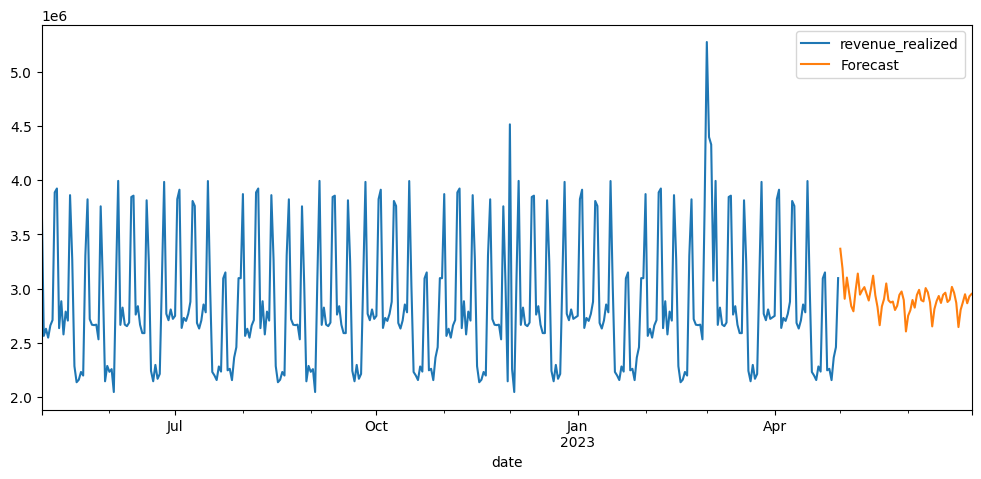

In [60]:
model = SARIMAX(indexed_daily_revenue_bay['revenue_realized'],  
                order=(2, 0, 3),  
                seasonal_order=(2, 1, [1], 12)) 
result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_bay),  
                          end=len(indexed_daily_revenue_bay) + 60, 
                          typ='levels').rename('Forecast') 
  
indexed_daily_revenue_bay['revenue_realized'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [61]:
model = SARIMAX(indexed_daily_revenue_bay['revenue_realized'],  
                order=(2, 0, 3),  
                seasonal_order=(2, 1, [1], 12)) 
result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_bay),  
                          end=len(indexed_daily_revenue_bay) + 60, 
                          typ='levels').rename('Forecast') 

print(forecast)  


2023-05-01    3.367966e+06
2023-05-02    3.186395e+06
2023-05-03    2.905793e+06
2023-05-04    3.101818e+06
2023-05-05    2.965755e+06
                  ...     
2023-06-26    2.873124e+06
2023-06-27    2.947676e+06
2023-06-28    2.864519e+06
2023-06-29    2.928393e+06
2023-06-30    2.950711e+06
Freq: D, Name: Forecast, Length: 61, dtype: float64


In [89]:
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(indexed_daily_revenue_bay['revenue_realized'],  
                order=(2, 0, 3),  
                seasonal_order=(2, 1, [1], 12)) 
result = model.fit()

with open('sarimax_model5.pkl', 'wb') as file:
    pickle.dump(result, file)

In [62]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

palace_df = df[df['property_name'] == 'Atliq Palace']
daily_revenue_palace = palace_df.groupby('date')['revenue_realized'].sum().reset_index()

print(daily_revenue_palace)

          date  revenue_realized
0   2022-05-01           4494961
1   2022-05-02           2951759
2   2022-05-03           3141965
3   2022-05-04           2958394
4   2022-05-05           3134393
..         ...               ...
358 2023-04-26           2689603
359 2023-04-27           2535155
360 2023-04-28           2513237
361 2023-04-29           2621008
362 2023-04-30           3769391

[363 rows x 2 columns]


In [63]:
indexed_daily_revenue_palace = daily_revenue_palace.set_index(['date'])

In [64]:
from datetime import datetime
indexed_daily_revenue_palace.head(5)

,revenue_realized
date,
2022-05-01,4494961
2022-05-02,2951759
2022-05-03,3141965
2022-05-04,2958394
2022-05-05,3134393


In [65]:
indexed_daily_revenue_palace.tail(5)

,revenue_realized
date,
2023-04-26,2689603
2023-04-27,2535155
2023-04-28,2513237
2023-04-29,2621008
2023-04-30,3769391


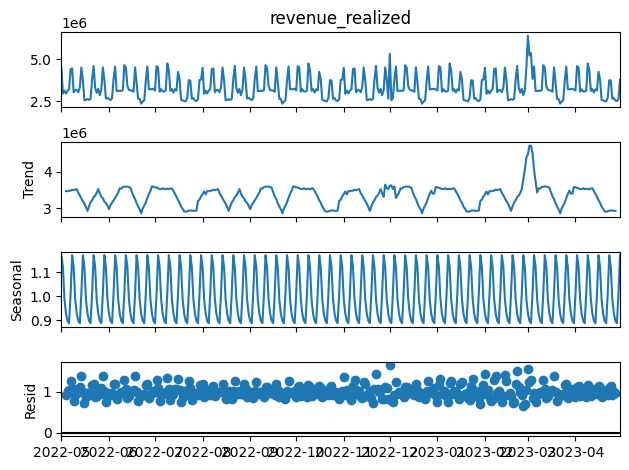

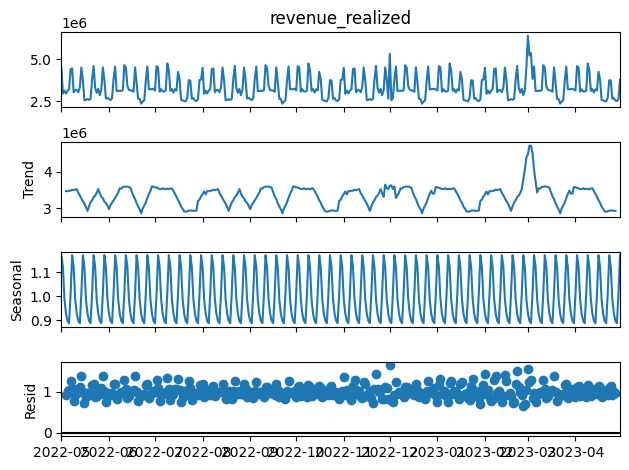

In [66]:
indexed_daily_revenue_palace.index = pd.to_datetime(indexed_daily_revenue_palace.index, format='%d-%m-%Y')
indexed_daily_revenue_palace = indexed_daily_revenue_palace.asfreq('D')
indexed_daily_revenue_palace['revenue_realized'] = indexed_daily_revenue_palace['revenue_realized'].interpolate()
result = seasonal_decompose(indexed_daily_revenue_palace['revenue_realized'], model='multiplicative')
result.plot()

In [67]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 
  
stepwise_fit = auto_arima(indexed_daily_revenue_palace['revenue_realized'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',  
                          suppress_warnings = True,  
                          stepwise = True)           
  
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=10602.361, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10860.686, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10696.010, Time=0.28 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=10604.210, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10858.979, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=10769.103, Time=0.10 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=10594.698, Time=0.48 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=10670.027, Time=0.37 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=10586.099, Time=1.88 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=10602.582, Time=1.60 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=10587.744, Time=3.06 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=10592.590, Time=1.55 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=10592.352, Time=1.40 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=10604.210, Time=1.24 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  365
Model:             SARIMAX(3, 0, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -5242.675
Date:                                 Tue, 02 Apr 2024   AIC                          10503.349
Time:                                         22:22:24   BIC                          10538.147
Sample:                                     05-01-2022   HQIC                         10517.196
                                          - 04-30-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0323      0.122     16.677      0.000       1.793       2.271
ar.L2         -1.9748      0.151    -13.066      0.000      -2.271      -1.679
ar.L3          0.7802      0.121      6.456      0.000       0.543       1.017
ma.L1         -1.6151      0.184     -8.756      0.000      -1.977      -1.254
ma.L2          1.4292      0.215      6.647      0.000       1.008       1.851
ma.L3         -0.4127      0.181     -2.284      0.022      -0.767      -0.059
ma.S.L12      -1.2224      0.158     -7.749      0.000      -1.532      -0.913
ma.S.L24       0.3102      0.144      2.150      0.032       0.027       0.593
sigma2       7.38e+11   2.32e-13   3.18e+24      0.000    7.38e+11    7.38e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                25.11
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.53
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.15e+40. Standard errors may be unstable.
"""

In [68]:
train = indexed_daily_revenue_palace.iloc[:270] 
test = indexed_daily_revenue_palace.iloc[270:]   

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(0, 1, [1,2], 12)) 

result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                        revenue_realized   No. Observations:                  270
Model:             SARIMAX(3, 0, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -3817.334
Date:                                 Tue, 02 Apr 2024   AIC                           7652.668
Time:                                         22:22:30   BIC                           7684.645
Sample:                                     05-01-2022   HQIC                          7665.526
                                          - 01-25-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2064      0.046     47.911      0.000       2.116       2.297
ar.L2         -2.1931      0.057    -38.227      0.000      -2.306      -2.081
ar.L3          0.9490      0.046     20.762      0.000       0.859       1.039
ma.L1         -2.0281      0.135    -15.073      0.000      -2.292      -1.764
ma.L2          1.9562      0.194     10.058      0.000       1.575       2.337
ma.L3         -0.7601      0.135     -5.641      0.000      -1.024      -0.496
ma.S.L12      -1.0418      0.174     -6.001      0.000      -1.382      -0.702
ma.S.L24       0.3590      0.147      2.444      0.015       0.071       0.647
sigma2      7.098e+11   3.54e-14   2.01e+25      0.000     7.1e+11     7.1e+11
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):                22.00
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.49
Prob(H) (two-sided):                  0.87   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.95e+41. Standard errors may be unstable.
"""

<Axes: xlabel='date'>

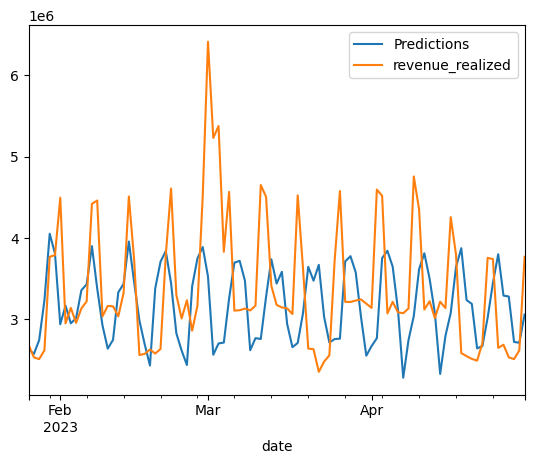

In [69]:
start = len(train) 
end = len(train) + len(test) - 1

predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
predictions.plot(legend = True) 
test['revenue_realized'].plot(legend = True) 

In [70]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

predictions = result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

rmse_value = rmse(test["revenue_realized"], predictions) 
print("Root Mean Squared Error (RMSE):", rmse_value)

mse_value = mean_squared_error(test["revenue_realized"], predictions) 
print("Mean Squared Error (MSE):", mse_value)

max_value = test["revenue_realized"].max()
min_value = test["revenue_realized"].min()

rmse_percentage = (rmse_value / (max_value - min_value)) * 100
mse_percentage = (mse_value / ((max_value - min_value) ** 2)) * 100

print("RMSE Percentage of Data Range:", rmse_percentage)
print("MSE Percentage of Data Range:", mse_percentage)

Root Mean Squared Error (RMSE): 882908.3155992978
Mean Squared Error (MSE): 779527093754.3892
RMSE Percentage of Data Range: 21.781467882919923
MSE Percentage of Data Range: 4.744323431346721


<Axes: xlabel='date'>

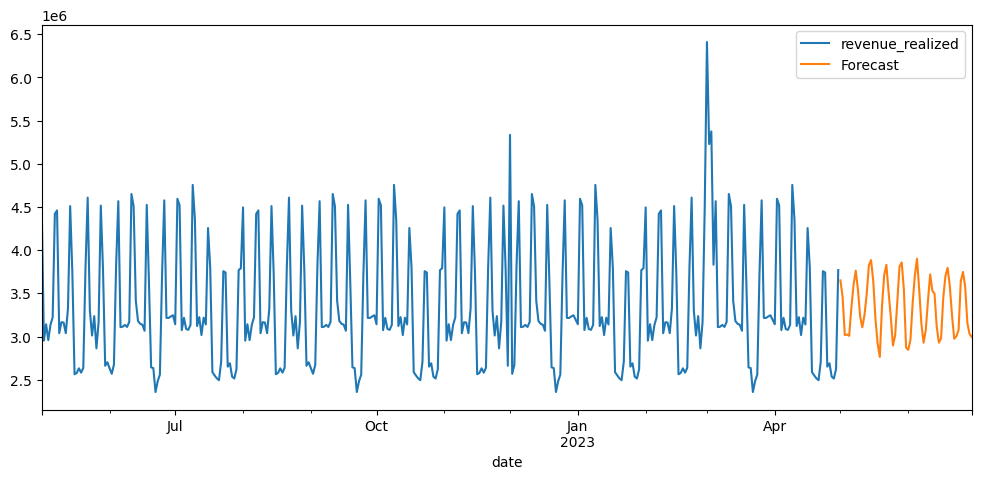

In [71]:
model = SARIMAX(indexed_daily_revenue_palace['revenue_realized'],  
                 order=(3, 0, 3),  
                seasonal_order=(0, 1, [1,2], 12)) 

result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_palace),  
                          end=len(indexed_daily_revenue_palace) + 60, 
                          typ='levels').rename('Forecast') 
  
indexed_daily_revenue_palace['revenue_realized'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [72]:
model = SARIMAX(indexed_daily_revenue_palace['revenue_realized'],  
               order=(3, 0, 3),  
               seasonal_order=(0, 1, [1,2], 12)) 
result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_palace),  
                          end=len(indexed_daily_revenue_palace) + 60, 
                          typ='levels').rename('Forecast') 

print(forecast)  

2023-05-01    3.649798e+06
2023-05-02    3.456839e+06
2023-05-03    3.016312e+06
2023-05-04    3.023457e+06
2023-05-05    3.007786e+06
                  ...     
2023-06-26    3.748251e+06
2023-06-27    3.577689e+06
2023-06-28    3.158930e+06
2023-06-29    3.028568e+06
2023-06-30    2.994650e+06
Freq: D, Name: Forecast, Length: 61, dtype: float64


In [90]:
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(indexed_daily_revenue_palace['revenue_realized'],  
               order=(3, 0, 3),  
               seasonal_order=(0, 1, [1,2], 12)) 
result = model.fit()

with open('sarimax_model6.pkl', 'wb') as file:
    pickle.dump(result, file)

In [73]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

bay_df = df[df['property_name'] == 'Atliq Seasons']
daily_revenue_seasons = bay_df.groupby('date')['revenue_realized'].sum().reset_index()

print(daily_revenue_seasons)

          date  revenue_realized
0   2022-05-01            987649
1   2022-05-02            628099
2   2022-05-03            626790
3   2022-05-04            742050
4   2022-05-05            747507
..         ...               ...
358 2023-04-26            612272
359 2023-04-27            622965
360 2023-04-28            575314
361 2023-04-29            594490
362 2023-04-30            832592

[363 rows x 2 columns]


In [74]:
indexed_daily_revenue_seasons = daily_revenue_seasons.set_index(['date'])

In [75]:
from datetime import datetime
indexed_daily_revenue_seasons.head(5)

,revenue_realized
date,
2022-05-01,987649
2022-05-02,628099
2022-05-03,626790
2022-05-04,742050
2022-05-05,747507


In [76]:
indexed_daily_revenue_seasons.tail(5)

,revenue_realized
date,
2023-04-26,612272
2023-04-27,622965
2023-04-28,575314
2023-04-29,594490
2023-04-30,832592


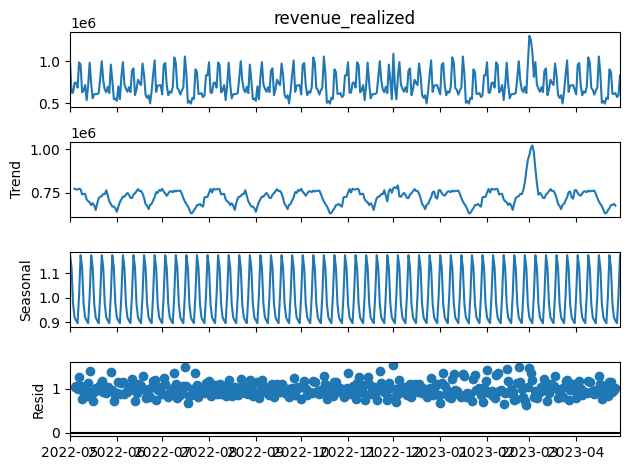

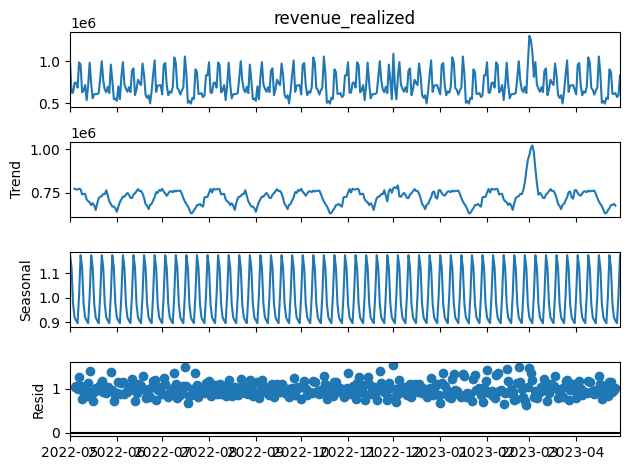

In [77]:
indexed_daily_revenue_seasons.index = pd.to_datetime(indexed_daily_revenue_seasons.index, format='%d-%m-%Y')
indexed_daily_revenue_seasons = indexed_daily_revenue_seasons.asfreq('D')
indexed_daily_revenue_seasons['revenue_realized'] = indexed_daily_revenue_seasons['revenue_realized'].interpolate()
result = seasonal_decompose(indexed_daily_revenue_seasons['revenue_realized'], model='multiplicative')
result.plot()

In [78]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 
  
stepwise_fit = auto_arima(indexed_daily_revenue_seasons['revenue_realized'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',  
                          suppress_warnings = True,  
                          stepwise = True)           
  
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=9541.324, Time=1.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9778.693, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9635.414, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=9540.638, Time=0.83 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9776.951, Time=0.06 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=9690.354, Time=0.12 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=9538.914, Time=0.43 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=9602.799, Time=0.23 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=9533.677, Time=1.32 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=9542.598, Time=0.85 sec
 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=9533.039, Time=2.08 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=9539.433, Time=2.02 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=9623.634, Time=1.70 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=9533.113, Time=2.54 sec
 ARIMA(0,0,2)(2,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  365
Model:             SARIMAX(3, 0, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -4735.511
Date:                                 Tue, 02 Apr 2024   AIC                           9489.021
Time:                                         22:55:15   BIC                           9523.820
Sample:                                     05-01-2022   HQIC                          9502.868
                                          - 04-30-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6526      0.218      2.990      0.003       0.225       1.080
ar.L2         -0.6494      0.246     -2.639      0.008      -1.132      -0.167
ar.L3         -0.1157      0.209     -0.555      0.579      -0.525       0.293
ma.L1         -0.1082      0.192     -0.565      0.572      -0.484       0.267
ma.L2          0.5103      0.155      3.289      0.001       0.206       0.814
ma.L3          0.5581      0.157      3.549      0.000       0.250       0.866
ma.S.L12      -1.0626      0.130     -8.150      0.000      -1.318      -0.807
ma.S.L24       0.2056      0.117      1.750      0.080      -0.025       0.436
sigma2      4.105e+10   4.15e-12    9.9e+21      0.000     4.1e+10     4.1e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                21.38
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.60
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.09e+37. Standard errors may be unstable.
"""

In [79]:
train = indexed_daily_revenue_seasons.iloc[:270] 
test = indexed_daily_revenue_seasons.iloc[270:]   

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(0, 1, [1,2], 12)) 

result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                        revenue_realized   No. Observations:                  270
Model:             SARIMAX(3, 0, 3)x(0, 1, [1, 2], 12)   Log Likelihood               -3461.407
Date:                                 Tue, 02 Apr 2024   AIC                           6940.815
Time:                                         22:57:35   BIC                           6972.791
Sample:                                     05-01-2022   HQIC                          6953.673
                                          - 01-25-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6974      0.245      2.847      0.004       0.217       1.177
ar.L2         -0.6063      0.289     -2.099      0.036      -1.172      -0.040
ar.L3         -0.1819      0.222     -0.818      0.413      -0.618       0.254
ma.L1         -0.1805      0.221     -0.815      0.415      -0.614       0.253
ma.L2          0.4428      0.189      2.341      0.019       0.072       0.814
ma.L3          0.5619      0.172      3.276      0.001       0.226       0.898
ma.S.L12      -0.9580      0.142     -6.762      0.000      -1.236      -0.680
ma.S.L24       0.1726      0.119      1.445      0.148      -0.061       0.407
sigma2      3.903e+10   9.18e-12   4.25e+21      0.000     3.9e+10     3.9e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                14.28
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             0.57
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.22e+37. Standard errors may be unstable.
"""

<Axes: xlabel='date'>

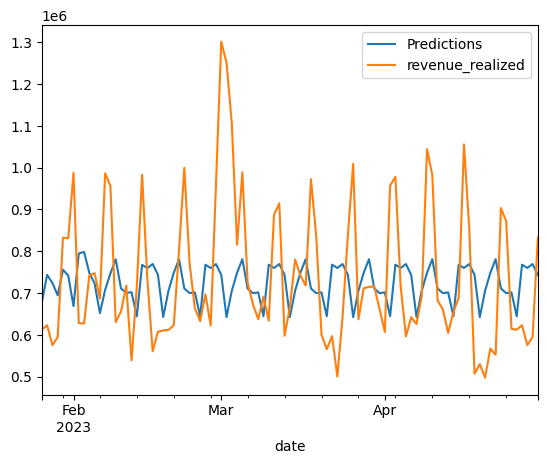

In [80]:
start = len(train) 
end = len(train) + len(test) - 1

predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
predictions.plot(legend = True) 
test['revenue_realized'].plot(legend = True) 

In [81]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

predictions = result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

rmse_value = rmse(test["revenue_realized"], predictions) 
print("Root Mean Squared Error (RMSE):", rmse_value)

mse_value = mean_squared_error(test["revenue_realized"], predictions) 
print("Mean Squared Error (MSE):", mse_value)

max_value = test["revenue_realized"].max()
min_value = test["revenue_realized"].min()

rmse_percentage = (rmse_value / (max_value - min_value)) * 100
mse_percentage = (mse_value / ((max_value - min_value) ** 2)) * 100

print("RMSE Percentage of Data Range:", rmse_percentage)
print("MSE Percentage of Data Range:", mse_percentage)

Root Mean Squared Error (RMSE): 173170.47151971483
Mean Squared Error (MSE): 29988012206.36037
RMSE Percentage of Data Range: 21.525470330894297
MSE Percentage of Data Range: 4.633458729662107


<Axes: xlabel='date'>

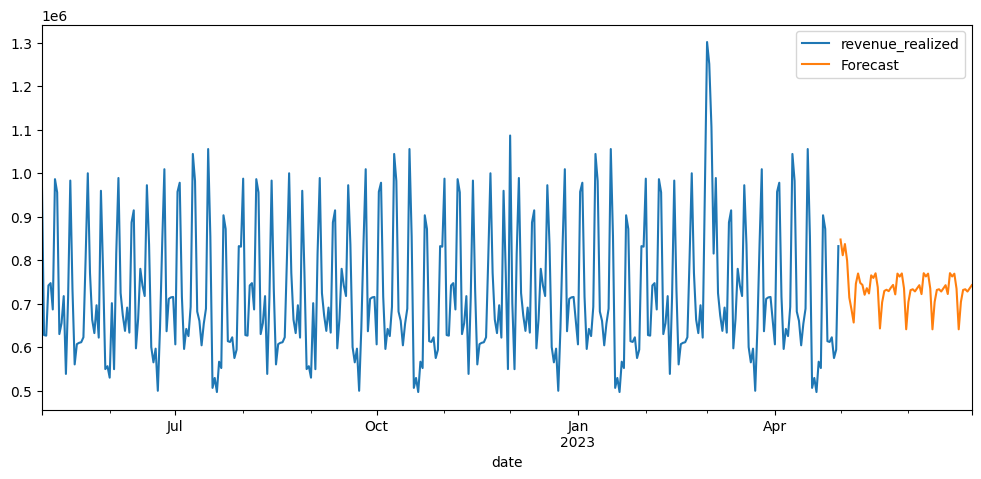

In [82]:
model = SARIMAX(indexed_daily_revenue_seasons['revenue_realized'],  
                 order=(3, 0, 3),  
                seasonal_order=(0, 1, [1,2], 12)) 

result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_seasons),  
                          end=len(indexed_daily_revenue_seasons) + 60, 
                          typ='levels').rename('Forecast') 
  
indexed_daily_revenue_seasons['revenue_realized'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [83]:
model = SARIMAX(indexed_daily_revenue_seasons['revenue_realized'],  
               order=(3, 0, 3),  
               seasonal_order=(0, 1, [1,2], 12)) 
result = model.fit() 
  
forecast = result.predict(start=len(indexed_daily_revenue_seasons),  
                          end=len(indexed_daily_revenue_seasons) + 60, 
                          typ='levels').rename('Forecast') 

print(forecast)  

2023-05-01    847759.848171
2023-05-02    811605.409891
2023-05-03    837317.579624
2023-05-04    799152.331364
2023-05-05    714201.975214
                  ...      
2023-06-26    731846.562985
2023-06-27    733397.534002
2023-06-28    728132.782511
2023-06-29    735467.608068
2023-06-30    742797.428973
Freq: D, Name: Forecast, Length: 61, dtype: float64


In [84]:
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(indexed_daily_revenue_seasons['revenue_realized'],  
                order=(3, 0, 3),  
                seasonal_order=(0, 1, [1,2], 12)) 
result = model.fit()

with open('sarimax_model7.pkl', 'wb') as file:
    pickle.dump(result, file)
